<h3 style='text-align: center;'>CodeClause</h3>
<h1 align="center">Wine Quality Prediction</h1> 
<div style="text-align: right">Created<br>
-- by Ruhit Debnath<br>
-- for CodeClause<br>
-- June, 2023</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Import the dataset to a dataframe
df=pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
#Number of rows and columns in the dataset
df.shape

(1143, 13)

In [4]:
#first 5 rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
#Checking for missing values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
#DataAnalysis and visualization
#statistical measure of the dataset
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


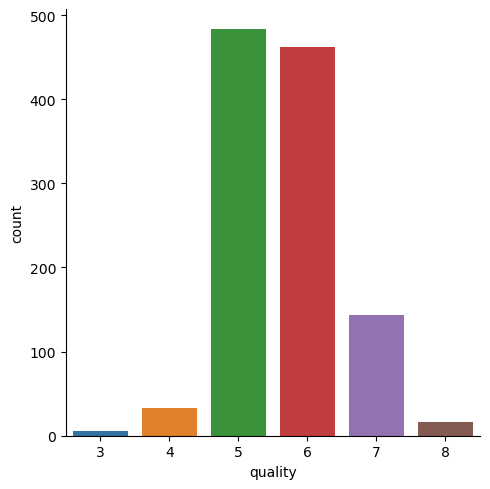

In [7]:
#number of values for each quality 
sns.catplot(x='quality',data=df,kind='count')
plt.show()

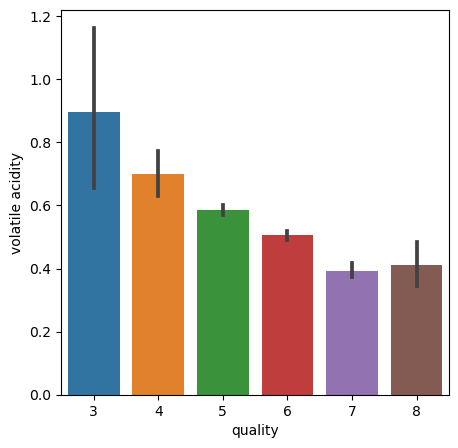

In [8]:
#volatile acidity vs Quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.show()

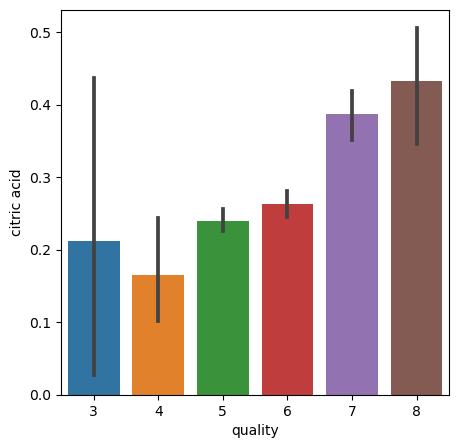

In [9]:
# Citric vs Quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df)
plt.show()

In [10]:
#correlation
corr=df.corr()
print(corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                   

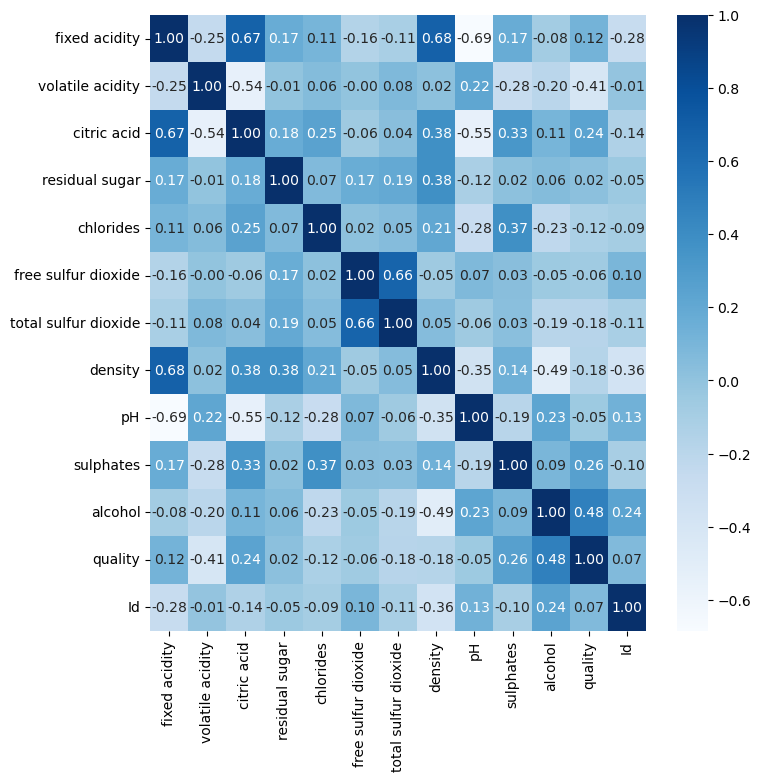

In [11]:
#Heat Map
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='Blues')
plt.show()

In [12]:
#Data preprocessing 
#separate the data and label
X=df.drop(['Id','quality'],axis=1)
Y=df['quality'].apply(lambda y_values:1 if y_values>=6 else 0)
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [13]:
#Train and test split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2)
print(X_train,X_test,Y_train,Y_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1130            7.4             0.350         0.33             2.4      0.068   
453             9.5             0.885         0.27             2.3      0.084   
1072            6.2             0.440         0.39             2.5      0.077   
877             6.5             0.670         0.00             4.3      0.057   
193             7.9             0.545         0.06             4.0      0.087   
...             ...               ...          ...             ...        ...   
1099            6.2             0.520         0.08             4.4      0.071   
466            10.7             0.430         0.39             2.2      0.106   
299             9.5             0.780         0.22             1.9      0.077   
493             5.1             0.470         0.02             1.3      0.034   
527             9.0             0.690         0.00             2.4      0.088   

      free sulfur dioxide  

In [14]:
#Model Training 
#Random Forest Classifier 
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [15]:
#Model Evaluation
#accuracy for test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy:",test_data_accuracy)

Accuracy: 0.7641921397379913


In [18]:
#Building a predictive system
input_data=(7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4)
#changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the data as we are predicting the label for only one instance 
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped )
print(prediction)
if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')


[0]
Bad Quality Wine


In [17]:
#Building a predictive system
input_data1=(11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8)
#changing the input data to numpy array
input_data1_as_numpy_array=np.asarray(input_data1)
#reshape the data as we are predicting the label for only one instance 
input_data1_reshaped=input_data1_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data1_reshaped )
print(prediction)
if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Win')

[1]
Good Quality Wine
